# 多个输入通道和输出通道

## 多输入通道
- 彩色图像可能有RGB三个通道
- 转换为灰度会丢失信息
- 每个通道都有一个卷积核，结果是所有通道卷积结果的和

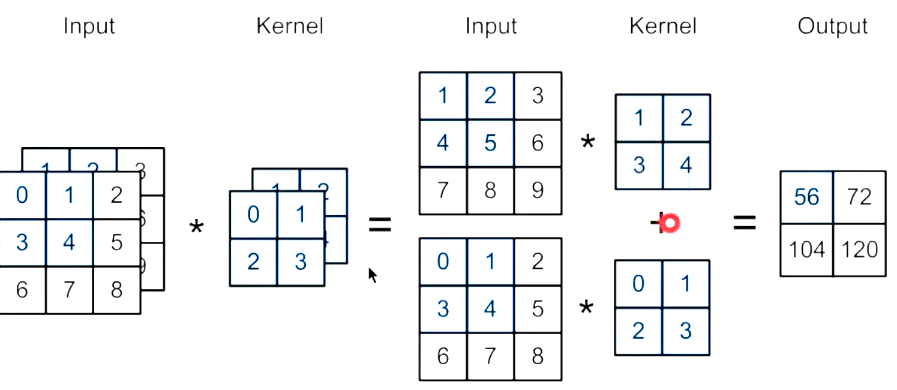

## 多输出通道
- 无论有多少输入通道，到目前为止我们只用到单输出通道
- 我们可以有多个三维卷积核，每个核生成一个输出通道

作用：
- 每个输出通道可以识别特定模式
- 输入通道核识别并组合输入中的模式

## 1✖1卷积层
kh = kw = 1是一个受欢迎的选择，它不识别空间模式，只是融合通道

In [ ]:
import torch 
from d2l import torch as d2l

In [ ]:
def corr2d_multi_in(X, K):
    """先遍历X和K的第0个维度(通道),再相加"""
    return sum(d2l.corr2d(x, k)for x, k in zip(X, K))

In [15]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
                  [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])

K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]],
                  [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

In [14]:
#多输出通道
def corr2d_multi_in_out(X, K):
    """迭代K的第0个维度,每次都对X执行互相关运算"""
    return torch.stack([corr2d_multi_in(X, k) for k in  K], 0)

In [16]:
K = torch.stack((K, K+1, K+2), 0)
K.shape

torch.Size([3, 2, 2, 2])

In [17]:
corr2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

In [40]:
#1✖1卷积层
def corr2d_multi_in_out_1X1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = X.reshape((c_i, h * w))
    K = K.reshape((c_o, c_i))
    #全连接层中的矩阵乘法
    Y = torch.matmul(K, X)
    #进行矩阵乘法后Y的形状变为(c_o, h*w)
    return Y.reshape((c_o, h, w))

In [41]:
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))

Y1 = corr2d_multi_in_out_1X1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(torch.abs(Y1 - Y2).sum()) < 1e-6